# Housing Price Predictions in Ames, Iowa

The aim of the project is to build an accurate predictor of house prices in Ames, Iowa.  This can be very helpful for people who are either trying to sell their house and are looking a fair evaluation of it's price or for people looking to buy a house to get some insights into the factors that play a key role in determing the house prices.  We will use advanced regression techniques such as **Gradient Boosting** to make these predictions.  This project is based on the **Kaggle** competition **House Prices: Advanced Regression Techniques**.

## Getting the data

The data for this project was obtained from the **Kaggle** links https://www.kaggle.com/c/house-prices-advanced-regression-techniques/download/train.csv and https://www.kaggle.com/c/house-prices-advanced-regression-techniques/download/test.csv for the train set and test set respectively.  Additionally, you can go to https://storage.googleapis.com/kaggle-competitions-data/kaggle/5407/205873/data_description.txt?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1572954709&Signature=sYEzPiNPFc%2Bq8wiQWT3WpeYQTStONcL%2FIHg0%2FVDmJ4XH3UecbgJB%2Bzr4gj%2FmdD7NOt6OHpsRP9tKWlGzbWzYTQ4QbfVXAtZt%2FMV6NOe2LVFQUcPQwQnM9ZBAnPAWUu6bZRRfOpGxENlPD4oDPA8Xmfod94G5BUOaL1JPOuPU%2Bkcv2UHEeffpAQxUK5%2B%2BcRhJMl68VDtxsuOkjfKj3D98Gl9FvOiioGdcRTE0L0h4i0RJQAp821g2MF5XqznbDpqDjpm6e7HhNDwkIvktBEBdwVYPE73BlpeRH%2B2awizGZIoVaCrliNIOcHyGCki8PqsK15AXr05Tt%2BVdZQKEr0KgxQ%3D%3D to get a description of the features used in the data.

Lets first import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

house-prices-advanced-regression-techniques



Lets load the data now.  The csv files have been uploaded as train.csv and test.csv.

In [2]:
train_df = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv",index_col="Id")
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test_df = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv",index_col="Id")
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Lets visualize the distribution of the sale prices of the houses.

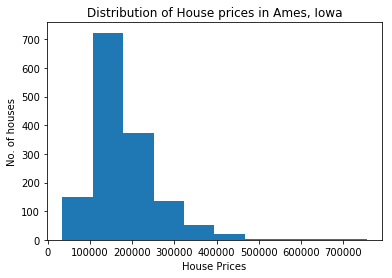

In [4]:
plt.hist(train_df["SalePrice"])
plt.xlabel("House Prices")
plt.ylabel("No. of houses")
plt.title("Distribution of House prices in Ames, Iowa")
plt.show()

The histogram makes it clear that the majority of houses were sold in the range of $100,000-200,000.

## Data Preprocessing

Lets separate the training dataframe into the features and the targets.

In [5]:
train_df.dropna(axis=0,subset=["SalePrice"],inplace=True)  #drop rows with no sale price
y_train=train_df.SalePrice  #define the target variable
X_train=train_df.drop("SalePrice",axis=1)  #drop sale price from predictor df

Lets separate the columns that deal with numerical and categorical data respectively. 

In [6]:
#Columns with numerical data
num_cols=[col for col in X_train.columns if X_train[col].dtype in ["int64","float64"]]
print("There are "+str(len(num_cols))+" numerical columns.")
num_cols

There are 36 numerical columns.


['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [7]:
#Columns with categorical data
cat_cols=[col for col in X_train.columns if X_train[col].dtype=="object"]
print("There are "+str(len(cat_cols))+" categorical columns.")
cat_cols

There are 43 categorical columns.


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

We will have to perform one hot encoding on the numerical columns.  Lets see the number of unique categories in each column.

In [8]:
X_train[cat_cols].nunique()

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

In [9]:
cols=num_cols+cat_cols
X_train=X_train[cols]
X_test=test_df[cols]

We will deal with missing values by imputing the missing values and we will use one hot encoding on the categorical columns.  To make the code cleaner and more compact, we will use pipelines.

In [10]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_transformer=SimpleImputer(strategy="median")

cat_transformer=Pipeline(steps=[
    ("impute",SimpleImputer(strategy="most_frequent")),
    ("onehot",OneHotEncoder(handle_unknown="ignore",sparse=False))
])

preprocessor=ColumnTransformer(transformers=[
    ("num",num_transformer,num_cols),
    ("cat",cat_transformer,cat_cols)
])

## Modeling

The model we will use in this case is the **XGBoost**.  It stands for extreme gradient boosting and is extremely efficient.

In [11]:
from xgboost import XGBRegressor

model=XGBRegressor(n_estimators=1000,learning_rate=0.05,random_state=0)

Now lets build a pipeline which connects the preprocessor and the model.

In [12]:
pipe=Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",model)
])

Let's fit the overall model to the training data.

In [13]:
pipe.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[11:21:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='median',
                                                                verbose=0),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond

## Cross Validation

We will use cross validation with 5 folds to evaluate our model's performance.  The metric we will use is the mean absolute error.

In [14]:
from sklearn.model_selection import cross_val_score

scores=-cross_val_score(pipe,X_train,y_train,cv=5,scoring="neg_mean_absolute_error") #The negative sign is used because negative mse is calculated
print("The average mean absolute error is "+str(scores.mean()))

/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:21:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:21:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:22:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:22:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:22:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The average mean absolute error is 15345.260426476883


## Final Predictions

Let's use our model to predict the sale price of houses in the test set.

In [15]:
preds=pipe.predict(X_test)

Let's convert our results into a dataframe with Id of the houses and their predicted prices.

In [16]:
output_df=pd.DataFrame({"Id":X_test.index,"SalePrice":preds})
output_df.head()

,Id,SalePrice
0,1461,122684.296875
1,1462,162699.906250
2,1463,179865.578125
3,1464,191359.546875
4,1465,177237.781250


Finally, let's convert the dataframe into a corresponding csv file.

In [17]:
output_df.to_csv("test_predictions.csv",index=False)

## Conclusion

The purpose of this project was to build an accurate predictor for house prices in Ames, Idaho.  By using **imputation** and **one-hot encoding**, we were able to preprocess the data so that it can be used in a standard model.  Then we built and trained a model which uses **gradient boosting** and then evaluated the model's performance using **cross validation**.  Finally, we were able to predict house sale prices using the model.